# XFLR5 Design Work

I can use [XFLR5](http://www.xflr5.tech/xflr5.htm) to do the design work and stability analysis for a tail section. This will save me from having to write a lot of code.

## NACA Airfoil Design

I'll follow the [video tutorials](https://www.youtube.com/playlist?list=PLtl5ylS6jdP6uOxzSJKPnUsvMbkmalfKg) for XFLR5, starting with the Airfoil Design. The cross section of the main wing is a NACA 4410 airfoil, so I'll plot that. I'll use 250 panels because my computer is probably good enough to run with that.

Inputs:
- NACA: `4410`
- Number of Panels: `250`

The tutorial recommends that I refine the design globally to make sure there are a correct number of panels, so I did, setting the panels to 250 and leaving all other parameters the same.

Next is the Analysis part. I opened up the `Analysis/Define an Analysis` menu and set the following parameters:
- Type 1 Analysis (Since it's just an airfoil analysis)
- Reynolds Number: `308639`

I found that in order to have the coefficient of pressure plot show up after the analysis I needed to check the `Store Opp` in the Direct Foil Analysis context menu. The polar looks reasonable to me, and with a negative coefficient of pressure it'll achieve lift.

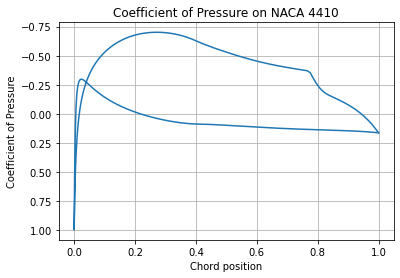

In [18]:
import numpy as np
import matplotlib.pyplot as plt

cp_data = np.genfromtxt("data/xflr5/4410_Cp_Graph.csv", skip_header=1, delimiter=",")
plt.plot(cp_data[:,0], cp_data[:,1])
plt.title("Coefficient of Pressure on NACA 4410")
plt.xlabel("Chord position")
plt.ylabel("Coefficient of Pressure")
plt.grid()
plt.gca().invert_yaxis()

Next I did the analysis across a set of angle of attacks. I chose an angle of attack increment of 0.25, and did from 0 to -10, and then 0 to 20 degrees. I got a pretty nice looking Drag Polar out of this. Initially I tried doing this with a greater range, but ran into convergence issues past -10 and 20 degrees. I also wanted to stay in the range that I used in the previous notebook's XFOIL analysis.

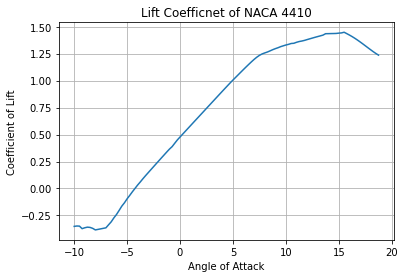

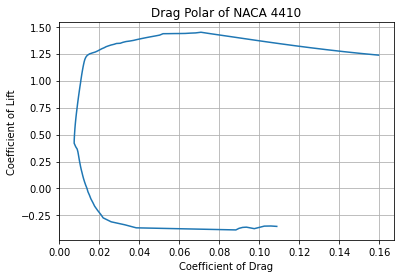

In [21]:
drag_polar_data = np.genfromtxt("data/xflr5/4410_Polar_T1_Re0.309_M0.00_N9.0.csv", delimiter=",", skip_header=10)
alpha = drag_polar_data[:,0]
cl = drag_polar_data[:,1]
cd = drag_polar_data[:,2]

plt.plot(alpha, cl)
plt.title("Lift Coefficnet of NACA 4410")
plt.xlabel("Angle of Attack")
plt.ylabel("Coefficient of Lift")
plt.grid()

plt.figure()
plt.plot(cd, cl)
plt.title("Drag Polar of NACA 4410")
plt.xlabel("Coefficient of Drag")
plt.ylabel("Coefficient of Lift")
plt.grid()